## K-means 聚类

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [39]:
# 函数作用为将每个数据点关联到最近簇中心所属的簇上，也就是为每个数据点找到离它最近的质心
def find_closest_centroids(X, centroids):
    m = X.shape[0] # 返回数据点个数
    k = centroids.shape[0] # 返回质心个数
    idx = np.zeros(m) # 构建一个与数据个数相同的全零数组

    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i, :] - centroids[j, :])**2) # 返回距离平方和
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return idx

In [40]:
data2 = pd.read_csv('ex7data2.csv')
print(data2)

           X1        X2
0    1.842080  4.607572
1    5.658583  4.799964
2    6.352579  3.290854
3    2.904017  4.612204
4    3.231979  4.939894
..        ...       ...
295  7.302787  3.380160
296  6.991984  2.987067
297  4.825534  2.779617
298  6.117681  2.854757
299  0.940489  5.715568

[300 rows x 2 columns]


In [41]:
X=data2.values
print(X)
# 以列表形式返回data2中的所有值。

[[ 1.84207953  4.6075716 ]
 [ 5.65858312  4.79996405]
 [ 6.35257892  3.2908545 ]
 [ 2.90401653  4.61220411]
 [ 3.23197916  4.93989405]
 [ 1.24792268  4.93267846]
 [ 1.97619886  4.43489674]
 [ 2.23454135  5.05547168]
 [ 2.98340757  4.84046406]
 [ 2.97970391  4.80671081]
 [ 2.11496411  5.37373587]
 [ 2.12169543  5.20854212]
 [ 1.5143529   4.77003303]
 [ 2.16979227  5.27435354]
 [ 0.41852373  4.88312522]
 [ 2.47053695  4.80418944]
 [ 4.06069132  4.99503862]
 [ 3.00708934  4.67897758]
 [ 0.66632346  4.87187949]
 [ 3.1621865   4.83658301]
 [ 0.51155258  4.91052923]
 [ 3.1342801   4.96178114]
 [ 2.04974595  5.6241395 ]
 [ 0.66582785  5.24399257]
 [ 1.01732013  4.84473647]
 [ 2.17893568  5.29758701]
 [ 2.85962615  5.26041997]
 [ 1.30882588  5.30158701]
 [ 0.99253246  5.01567424]
 [ 1.40372638  4.57527684]
 [ 2.66046572  5.19623848]
 [ 2.79995882  5.11526323]
 [ 2.06995345  4.6846713 ]
 [ 3.29765181  5.59205535]
 [ 1.8929766   4.89043209]
 [ 2.55983064  5.26397756]
 [ 1.15354031  4.67866717]
 

In [42]:
initial_centroids  = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
print(idx)

[0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 0.]


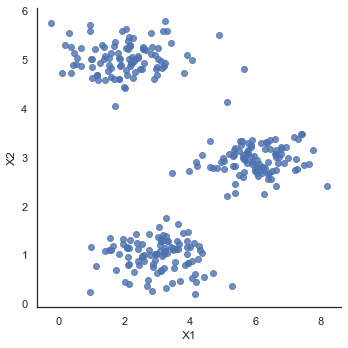

In [43]:
sb.set(context="notebook", style="white")
sb.lmplot(x='X1', y='X2', data=data2, fit_reg=False)
plt.show()
# 数据点可视化

In [44]:
# 计算簇的平均质心，并将质心进行更新
def compute_centroids(X, idx, k):
    m, n = X.shape # m为数据点个数，n为每个数据点的特征数
    centroids = np.zeros((k, n)) # 建立一个k*n的全零数组，用于存储新的质心，k为质心数，n为特征数

    for i in range(k):
        indices = np.where(idx == i) # 找到所有属于第i个质心的簇的数据点的坐标
        centroids[i, :] = (np.sum(X[indices, :], axis=1) /
                           len(indices[0])).ravel() # 将所有的坐标求和然后除以数据点个数求得平均值，并将平均值放到质心矩阵中

    return centroids # 返回质心

In [45]:
compute_centroids(data2.values, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [46]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0] # 质心数
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids) # 为每个数据点找到离它最近的质心
        centroids = compute_centroids(X, idx, k) # 计算簇的平均质心，并将质心更新
    
    return idx, centroids

In [47]:
idx, centroids = run_k_means(X, initial_centroids, 10)

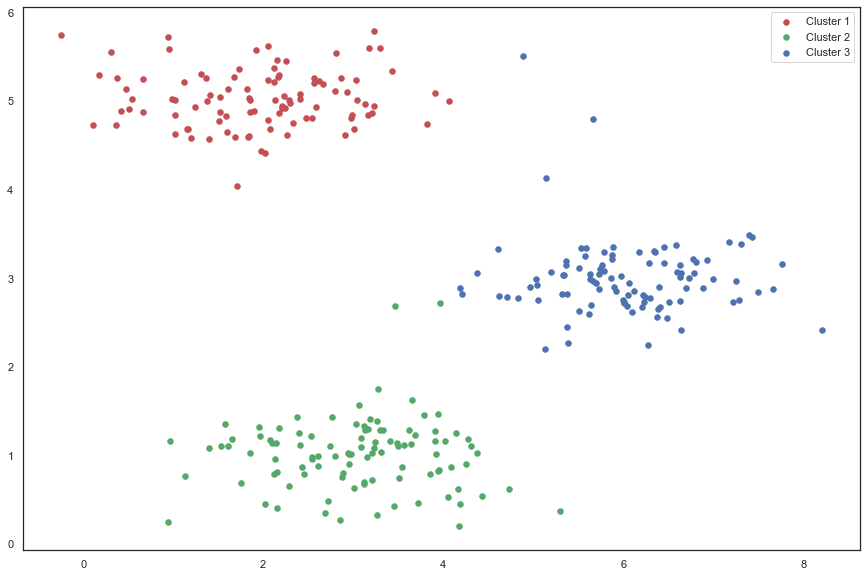

In [48]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

我们跳过的一个步骤是初始化聚类中心的过程。 这可以影响算法的收敛。 我们的任务是创建一个选择随机样本并将其用作初始聚类中心的函数。

In [49]:
# 初始化质心，从300个数据点中随机抽取三个点作为初始质心
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i, :] = X[idx[i], :]

    return centroids

In [52]:
init_centroids(X, 3)

array([[2.56869453, 5.20687886],
       [1.40260822, 1.08726536],
       [2.17893568, 5.29758701]])

## k值的选择
使用“肘部法则”选取k值

C:\Users\30226\.conda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


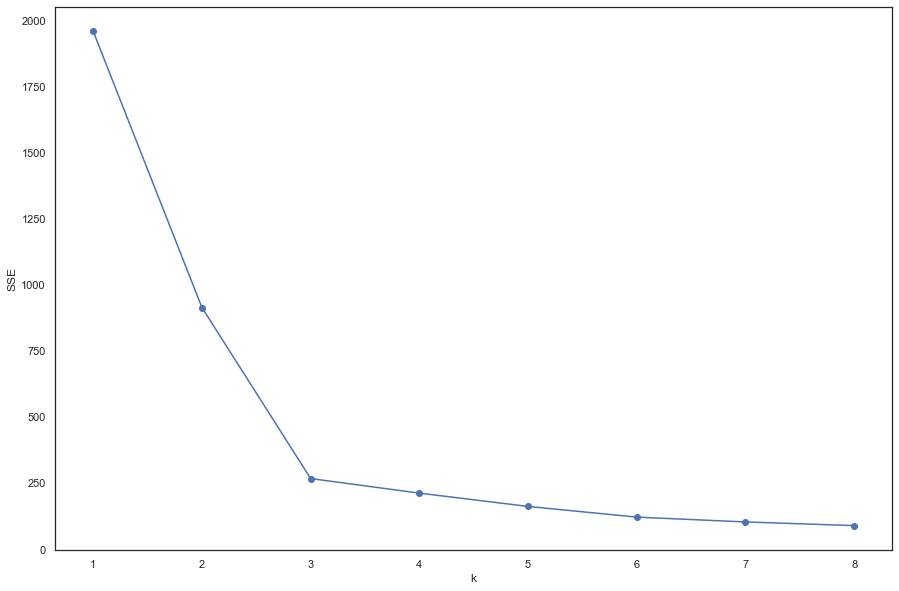

In [53]:
from sklearn.cluster import KMeans

# '利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(data2)
    SSE.append(estimator.inertia_) # 存放结果的误差平方和
X = range(1, 9)

plt.figure(figsize=(15, 10))
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

图中可以看出，k=3的时候是肘点，所以，选择k=3.

## K-means图像压缩

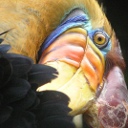

In [54]:
from IPython.display import Image
Image(filename='bird_small.png')

In [55]:
image_data = loadmat('bird_small.mat')
# image_data

In [56]:
A = image_data['A']
A.shape

(128, 128, 3)

In [57]:
# normalize value ranges
A = A / 255. # 归一化

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [58]:
# randomly initialize the centroids

initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [59]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

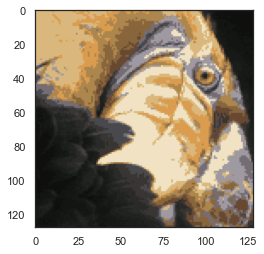

In [60]:
plt.imshow(X_recovered)
plt.show()